## Data Preparation & Data Cleaning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('ford.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
data = data.rename(columns=str.lower)

In [4]:
print("Dataset dimensions: ", data.shape)

Dataset dimensions:  (17966, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fueltype      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   enginesize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Dugaan kita benar, bahwa terdapat data duplikasi dengan melihat bahwa ada data yang memiliki nilai ID yang sama yang sebenarnya nilai ID seharusnya adalah nilai yang unik. Namun ini belum cukup membuktikan terdapat data duplikasi, kemudian kita akan mengecek apakah baris dengan ID yang sama memiliki nilai yang sama pada kolom lain

In [6]:
data['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [7]:
data['year'].unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060], dtype=int64)

In [8]:
data[data['year'] == 2060]

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [9]:
data = data.drop(data[data['year'] == 2060].index)

In [10]:
data['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [11]:
data['mileage'].unique()

array([15944,  9083, 12456, ..., 31348,  7010,  5007], dtype=int64)

In [12]:
data['mileage'].describe()

count     17965.000000
mean      23360.858447
std       19471.182902
min           1.000000
25%        9987.000000
50%       18242.000000
75%       31048.000000
max      177644.000000
Name: mileage, dtype: float64

In [13]:
data['fueltype'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [14]:
data[data['fueltype'] == "Other"]

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
17492,Mondeo,2015,13800,Automatic,19470,Other,0,67.3,2.0


In [15]:
data = data.drop(data[data['fueltype'] == "Other"].index)

In [16]:
data['tax'].value_counts()

145    8944
0      2152
150    1944
125    1407
30     1236
20     1210
160     358
200     252
235     123
165     113
205      59
260      41
240      32
265      15
300      11
135      10
140       8
570       6
195       6
325       6
555       4
115       3
155       3
220       3
330       2
305       2
230       2
580       2
190       2
120       2
210       1
185       1
110       1
270       1
290       1
22        1
Name: tax, dtype: int64

In [17]:
data['mpg'].value_counts()

65.7    2528
54.3    1774
60.1    1674
64.2     995
57.7     962
        ... 
37.1       1
28.0       1
54.2       1
28.5       1
23.9       1
Name: mpg, Length: 90, dtype: int64

In [18]:
data['enginesize'].unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 2.5, 1.8, 1.3,
       3.2, 0. , 1.7])

In [19]:
data['enginesize'].value_counts()

1.0    7765
1.5    3418
2.0    3310
1.2    1626
1.6     923
1.1     559
1.4     111
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: enginesize, dtype: int64

## Data Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as sns
import plotly.express as px

In [21]:
print(data.model)
print("")
print(data.model.unique())

0         Fiesta
1          Focus
2          Focus
3         Fiesta
4         Fiesta
          ...   
17961      B-MAX
17962      B-MAX
17963      Focus
17964         KA
17965      Focus
Name: model, Length: 17964, dtype: object

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']


In [22]:
grouped_model = data.groupby('model').size().reset_index(name = "counts")
grouped_model = grouped_model.sort_values(by  = "counts", ascending=False)

fig = px.bar(grouped_model, x = 'model', y = "counts", color= "model", labels={'counts':'Jumlah Laptop'}, title = "Jumlah Mobil Berdasarkan Modelnya")
fig.update_layout(width = 2400, height = 1000)
fig.show()

In [23]:
grouped_year = data.groupby('year').size().reset_index(name = "counts")
grouped_year['year'] = grouped_year['year'].astype('str')

fig = px.bar(grouped_year, x = 'year', y = 'counts', color = "year", labels={"counts": "Jumlah Laptop"}, title="Jumlah Laptop Berdasarkan Tahun Produksi")
fig.show()

In [24]:
grouped_transmission = data.groupby('transmission').size().reset_index(name='counts')

fig = px.bar(grouped_transmission, x = 'transmission', y = 'counts', color='transmission', labels={"counts": "Jumlah Mobil"}, title="Jumlah Laptop Berdasarkan Jenis Transmisinya")
fig.show()

In [25]:
fig = px.pie(grouped_transmission, values='counts', names = 'transmission', color = 'transmission', labels = {'counts': 'Jumlah Laptop'}, title = "Perbandingan Jumlah Laptop Berdasarkan Jenis Transmisinya")
fig.show()

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

grouped_transmission = data.groupby('transmission').size().reset_index(name='counts')

# Bar chart
fig1 = go.Figure(data=go.Bar(x=grouped_transmission['transmission'], y=grouped_transmission['counts'], marker_color=['red', 'green', 'yellow']))
fig1.update_layout(title='Jumlah Mobil Berdasarkan Jenis Transmisinya', xaxis_title='Jenis Transmisi', yaxis_title='Jumlah Mobil')

# Pie chart
fig2 = go.Figure(data=go.Pie(labels=grouped_transmission['transmission'], values=grouped_transmission['counts'], marker_colors=['red', 'green', 'yellow']))
fig2.update_layout(title='Perbandingan Jumlah Mobil Berdasarkan Jenis Transmisinya')

# Subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Jumlah Mobil", "Perbandingan Jumlah Mobil"), specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

fig.update_layout(height=500, width=1000, showlegend=True)
fig.show()


In [27]:
fig = px.histogram(data, x = 'mileage', title = "Distribusi Mobil Berdasarkan Mileage", marginal='box', color_discrete_sequence=['#ff1500'])
fig.show()

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

grouped_fueltype = data.groupby('fueltype').size().reset_index(name='counts')

# Bar chart
fig1 = go.Figure(data=go.Bar(x=grouped_fueltype['fueltype'], y=grouped_fueltype['counts'], marker_color=['red', 'green', 'yellow', 'blue']))
fig1.update_layout(title='Jumlah Mobil Berdasarkan Jenis Transmisinya', xaxis_title='Jenis Transmisi', yaxis_title='Jumlah Mobil', showlegend = False)

# Pie chart
fig2 = go.Figure(data=go.Pie(labels=grouped_fueltype['fueltype'], values=grouped_fueltype['counts'], marker_colors=['red', 'green', 'yellow', 'blue']))
fig2.update_layout(title='Perbandingan Jumlah Mobil Berdasarkan Jenis Transmisinya', showlegend = False)

# Subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Jumlah Mobil", "Perbandingan Jumlah Mobil"), specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

fig.update_layout(height=500, width=1000)
fig.show()


In [29]:
fig = px.histogram (data, x = 'tax', title = 'Distribusi Laptop Berdasarkan Besar Tax', marginal = 'box', color_discrete_sequence = ['#FF1050'])
fig.show()

In [30]:
data = data.drop(data[data['mpg'] == 201.8].index)

In [31]:
fig = px.histogram (data, x = 'mpg', title = 'Distribusi Laptop Berdasarkan Besar Tax', marginal = 'box', color_discrete_sequence = ['#FA2050'])
fig.show()

In [32]:
data['enginesize'].unique()

array([1. , 1.5, 1.6, 1.2, 2. , 1.1, 2.3, 1.4, 5. , 2.2, 1.8, 1.3, 3.2,
       2.5, 0. , 1.7])

In [33]:
grouped_enginesize = data.groupby('enginesize').size().reset_index(name='counts')
grouped_enginesize['enginesize'] = grouped_enginesize['enginesize'].astype('str')

fig = px.bar(grouped_enginesize, x = 'enginesize', y = 'counts', color = "enginesize", labels={'counts': "Jumlah Laptop"}, title="Distribusi Mobil berdasarkan nilai Engine Size")
fig.update_layout(
    width=2000,
    height = 1000
)
fig.show()

## Explanatory Data Analysis

### Random Forest

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import optuna

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import plotly.express as px

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

d:\Aplikasi\Program\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [35]:
data.describe()

,year,price,mileage,tax,mpg,enginesize
count,17959.000000,17959.000000,17959.000000,17959.000000,17959.000000,17959.000000
mean,2016.863300,12274.199120,23367.137925,113.324071,57.867236,1.350448
std,2.024593,4730.253975,19470.988735,62.013731,9.837966,0.431999
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9991.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18245.000000,145.000000,58.900000,1.200000
75%,2018.000000,15298.000000,31064.500000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,88.300000,5.000000


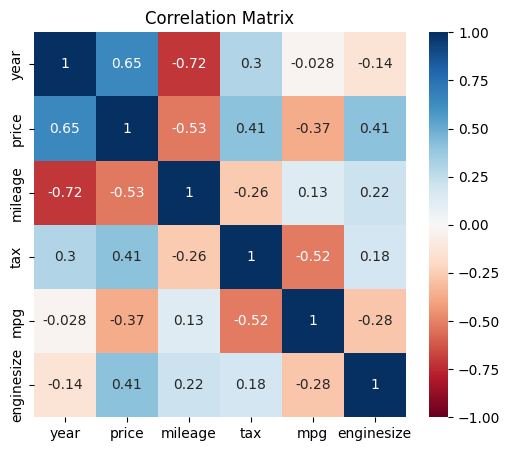

In [36]:
plt.figure(figsize=(6, 5))
sns.heatmap(data.corr(), cmap = 'RdBu', annot = True, vmin = -1, vmax = 1)
plt.title("Correlation Matrix")
plt.show()


In [37]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

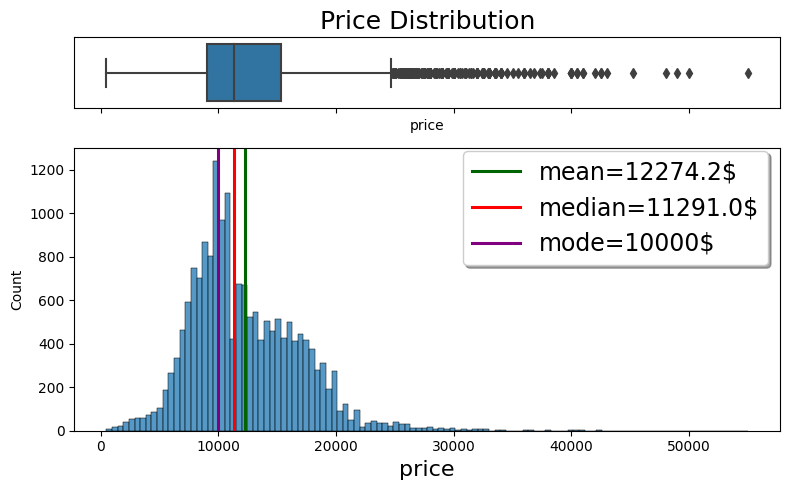

In [38]:
num_plot(data, "price", "Price Distribution", "$")

In [39]:
data['price'] = np.log(data['price'])

<AxesSubplot: xlabel='price', ylabel='Density'>

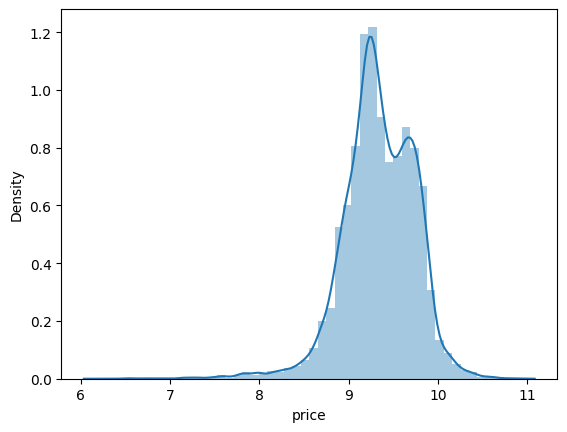

In [40]:
sns.distplot(data['price'])

In [41]:
data = data.fillna('NaN')

In [42]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize'],
      dtype='object')

In [43]:
data.describe()

,year,price,mileage,tax,mpg,enginesize
count,17959.000000,17959.000000,17959.000000,17959.000000,17959.000000,17959.000000
mean,2016.863300,9.339711,23367.137925,113.324071,57.867236,1.350448
std,2.024593,0.404294,19470.988735,62.013731,9.837966,0.431999
min,1996.000000,6.204558,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,9.104869,9991.000000,30.000000,52.300000,1.000000
50%,2017.000000,9.331761,18245.000000,145.000000,58.900000,1.200000
75%,2018.000000,9.635477,31064.500000,145.000000,65.700000,1.500000
max,2020.000000,10.914998,177644.000000,580.000000,88.300000,5.000000


In [44]:
catCols = ['model', 'transmission', 'fueltype']

In [45]:
print("Dataframe Encoded by OHE Dimension: ", pd.get_dummies(data, columns=catCols, drop_first=True).shape)

Dataframe Encoded by OHE Dimension:  (17959, 34)


In [46]:
en = LabelEncoder()
for col in catCols:
    data[col] = en.fit_transform(data[col])
print("Dataframe encoded by Label Encodign Dimension: ", data.shape)

Dataframe encoded by Label Encodign Dimension:  (17959, 9)


In [47]:
data.head()

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,5,2017,9.392662,0,15944,3,150,57.7,1.0
1,6,2018,9.546813,1,9083,3,150,57.7,1.0
2,6,2017,9.472705,1,12456,3,150,57.7,1.0
3,5,2019,9.769956,1,10460,3,145,40.3,1.5
4,5,2019,9.711116,0,1482,3,145,48.7,1.0


In [48]:
X = data.drop(['price'], axis=1).values
y = data['price'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [51]:
rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=15)

In [52]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=15)

In [53]:
y_pred_rf = rf.predict(X_test)

In [54]:
mse_rf = mean_squared_error(np.exp(y_test), np.exp(y_pred_rf))
print("RMSE using Random Forest: {} $".format(np.round(np.sqrt(mse_rf)), 4))

RMSE using Random Forest: 1357.0 $


In [55]:
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf), 4) * 100))

R2 using Random Forest: 93.35 %


In [56]:
feature_name_list = data.drop(['price'], axis=1).columns

In [57]:
rf.feature_names = feature_name_list

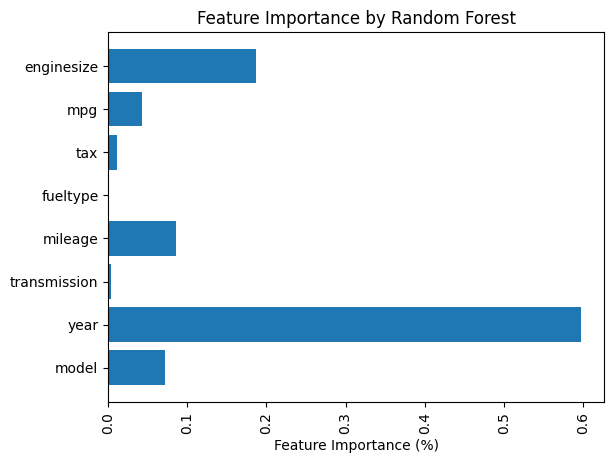

In [58]:
plt.barh(rf.feature_names, rf.feature_importances_)
plt.xticks(rotation = 90)
plt.title("Feature Importance by Random Forest")
plt.xlabel("Feature Importance (%)")
plt.show()

### XGBoost

In [59]:
def objective(trial, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dvalid = xgboost.DMatrix(X_val, label=y_val)

    param = {
        'objective' : 'reg:squarederror',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 5.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 5.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
    }


    model = xgboost.XGBRegressor(**param)    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)   
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse

In [61]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-06-06 22:24:20,782] A new study created in memory with name: no-name-ae3aa53a-a06a-4e03-8d23-954a658bf65d
[I 2023-06-06 22:24:21,325] Trial 0 finished with value: 0.0957357029172284 and parameters: {'lambda': 2.916431271498371, 'alpha': 0.0633668066061621, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 4, 'min_child_weight': 8}. Best is trial 0 with value: 0.0957357029172284.
[I 2023-06-06 22:24:22,050] Trial 1 finished with value: 0.09660760550502548 and parameters: {'lambda': 0.038186670900787194, 'alpha': 0.0735963230555994, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.25, 'n_estimators': 500, 'max_depth': 3, 'min_child_weight': 33}. Best is trial 0 with value: 0.0957357029172284.
[I 2023-06-06 22:24:22,530] Trial 2 finished with value: 0.09877875194938107 and parameters: {'lambda': 1.5540724672890056, 'alpha': 0.003674291032387958, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.25, 'n_estima

Number of finished trials:  10
Best trial:
  Value: 0.09258445247145482
  Params: 
    lambda: 3.172341757677282
    alpha: 0.1252240025421861
    colsample_bytree: 0.7
    subsample: 0.8
    learning_rate: 0.1
    n_estimators: 2500
    max_depth: 3
    min_child_weight: 2


In [62]:
params

[3.172341757677282, 0.1252240025421861, 0.7, 0.8, 0.1, 2500, 3, 2]

In [63]:
lambda_opt = params[0]
alpha_opt = params[1]
colsample_bytree_opt = params[2]
subsample_opt = params[3]
learning_rate_opt = params[4]
n_estimators_opt = params[5]
max_depth_opt = params[6]
min_child_weight_opt = params[7]

In [64]:
xgb = XGBRegressor(reg_lambda = lambda_opt,
                   alpha = alpha_opt,
                   colsample_bytree = colsample_bytree_opt,
                   subsample_opt = subsample_opt,
                   learning_rate = learning_rate_opt,
                   n_estimators = n_estimators_opt,
                   max_depth = max_depth_opt,
                   min_child_weight = min_child_weight_opt)

In [65]:
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=0)

[22:25:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "subsample_opt" } are not used.



XGBRegressor(alpha=0.1252240025421861, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=2500, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [66]:
y_pred_xgb = xgb.predict(X_test) 

In [67]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))

In [68]:
print("RMSE with XGBoost : {:.2f} $".format(np.round(np.sqrt(mse_xgb),2)))

RMSE with XGBoost : 1301.57 $


In [69]:
print("R2 with XGBoost: {:.2f} % ".format(np.round(r2_score(y_test, y_pred_xgb),4)*100))

R2 with XGBoost: 94.07 % 


In [70]:
xgb.feature_names = feature_name_list

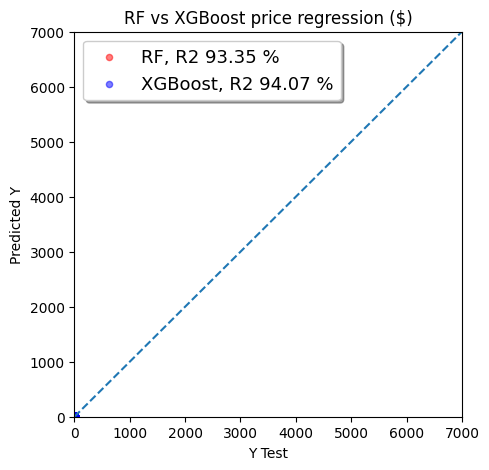

In [71]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='red', label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred_rf)*100), s=20)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='blue', label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100), s=20)
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RF vs XGBoost price regression ($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

In [72]:
print("RMSE using RF: {:.2f} $ ".format(np.sqrt(mse_rf)))
print("RMSE with XGBoost : {:.2f} $".format(np.sqrt(mse_xgb)))

RMSE using RF: 1357.31 $ 
RMSE with XGBoost : 1301.57 $


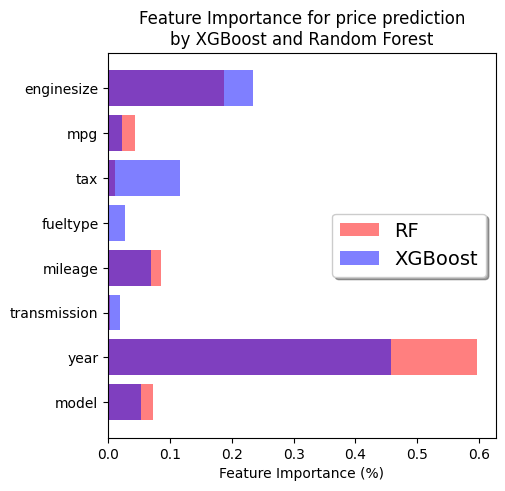

In [73]:
plt.figure(figsize=(5,5))
plt.barh(rf.feature_names,rf.feature_importances_, alpha=0.5, label='RF', color='red')
plt.barh(xgb.feature_names,xgb.feature_importances_, alpha=0.5, label='XGBoost', color='blue')
plt.legend(loc='center right',ncol=1, fontsize=14, fancybox=True, shadow=True, frameon=True)
plt.title('Feature Importance for price prediction\nby XGBoost and Random Forest')
plt.xlabel('Feature Importance (%)')
plt.show()

In [74]:
xgb.feature_names = data.drop(['price'], axis = 1).columns

In [75]:
feat_df= pd.DataFrame({'feature': xgb.feature_names,'importance':xgb.feature_importances_})

In [76]:
sorted_df=feat_df.sort_values('importance', ascending=False)

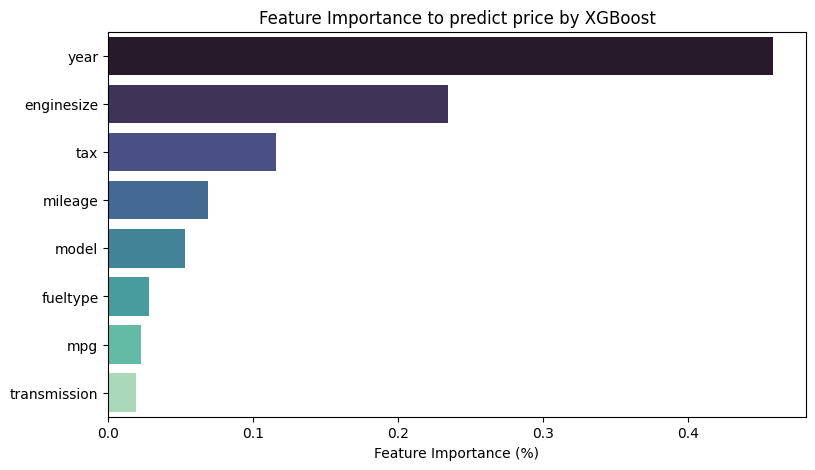

In [77]:
plt.figure(figsize=(9,5))
sns.barplot(x='importance', y='feature', data=sorted_df, palette='mako')
plt.title('Feature Importance to predict price by XGBoost')
plt.xlabel('Feature Importance (%)')
plt.ylabel('')
plt.show()

In [78]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb)]

Linear Regression : 80.80 %
K Nearest Neighbours : 42.40 %
Decision Tree : 82.00 %
Random Forest : 93.40 %
AdaBoost : 77.40 %
Gradient Boosting Regressor : 94.00 %
XGBRegressor : 94.20 %


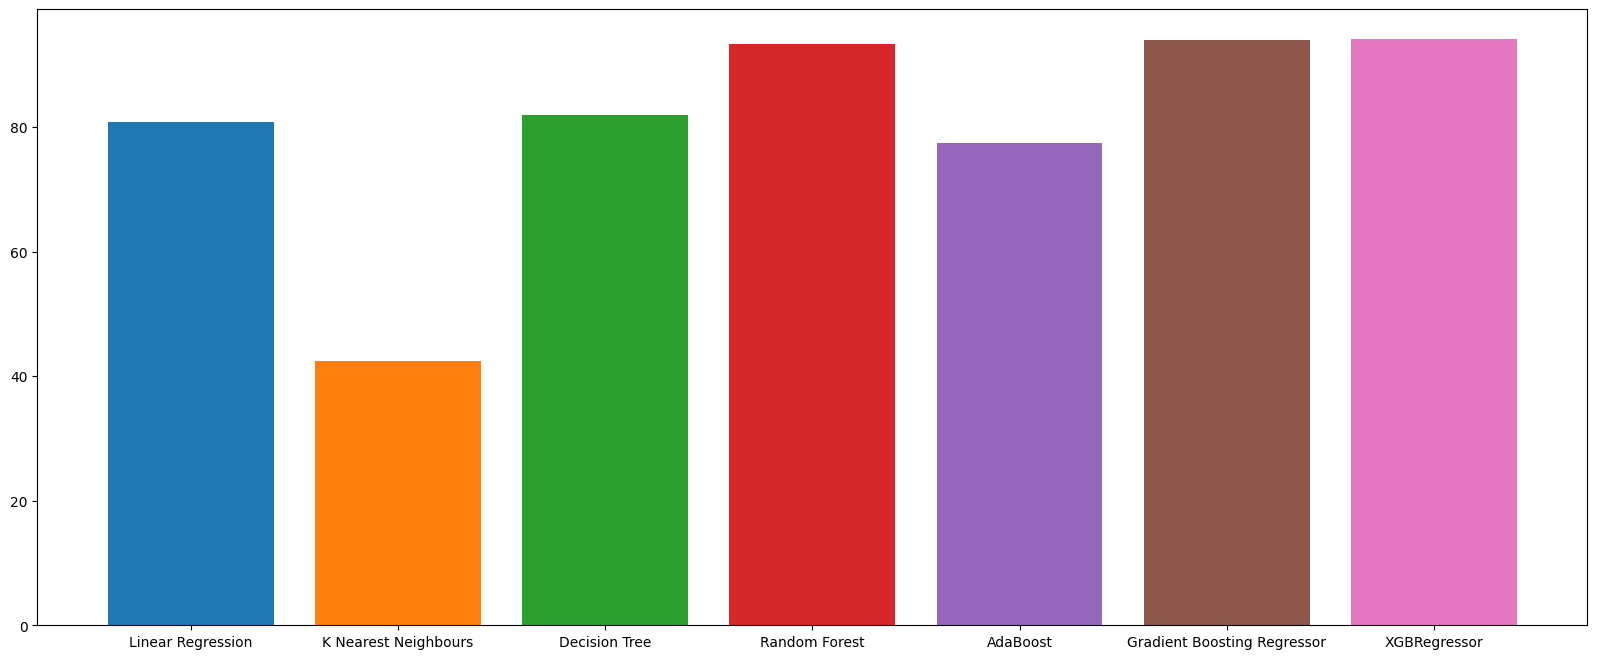

In [79]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.2f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [80]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(X_train)
x_test_trans = poly.fit_transform(X_test)

Linear Regression : 80.80 %
K Nearest Neighbours : 42.40 %
Decision Tree : 82.00 %
Random Forest : 93.50 %
AdaBoost : 76.60 %
Gradient Boosting Regressor : 94.00 %
XGBRegressor : 94.20 %


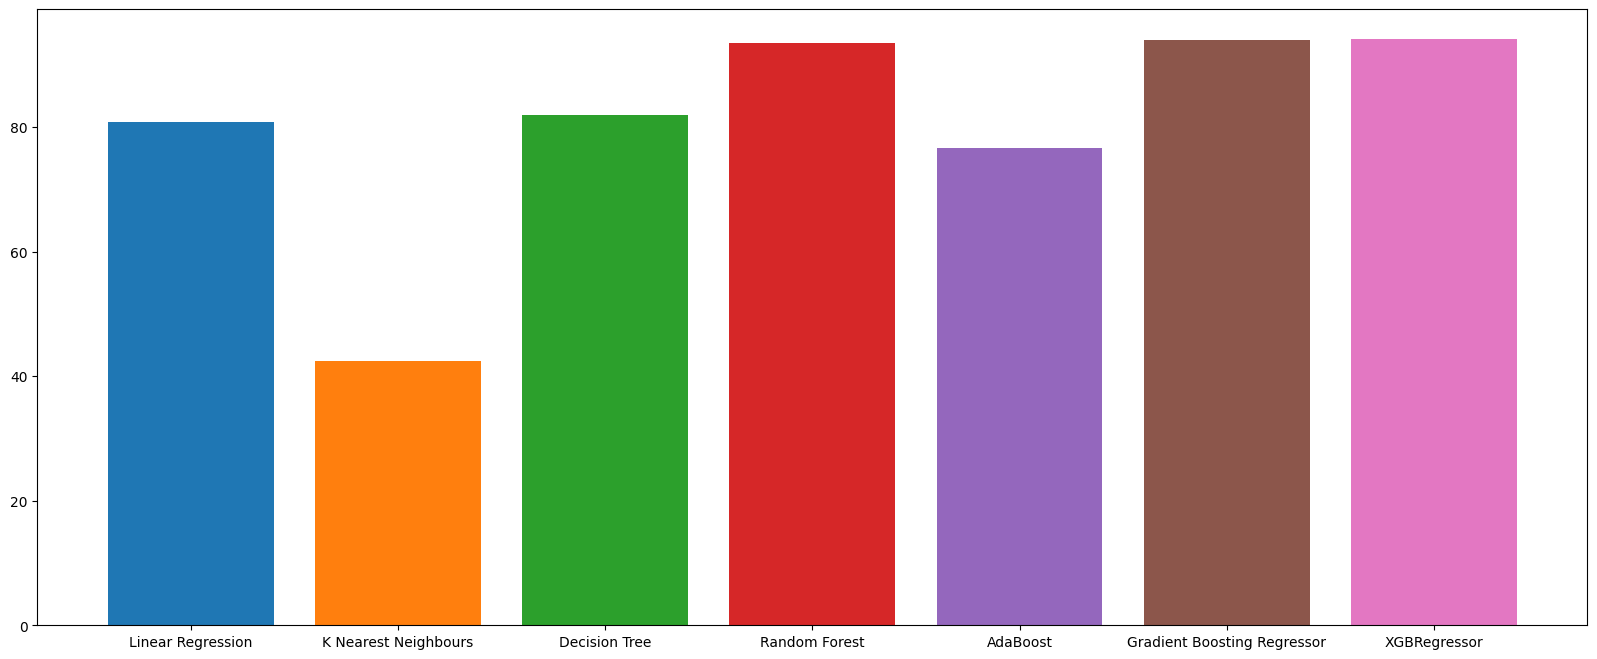

In [81]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.2f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [82]:
import plotly.graph_objects as go

accuracies = []
regressor_names = []
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'gray']

fig = go.Figure()

for i, (regressor_name, regressor) in enumerate(regressors):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test, y_pred), 3) * 100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    
    accuracies.append(accuracy)
    regressor_names.append(regressor_name)

sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
accuracies = [accuracies[i] for i in sorted_indices]
regressor_names = [regressor_names[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

fig.add_trace(go.Bar(x=regressor_names, y=accuracies, marker_color=colors))

fig.update_layout(title="Accuracy of Regression Models",
                  xaxis_title="Regressor",
                  yaxis_title="Accuracy (%)")
fig.show()

Linear Regression : 81 %
K Nearest Neighbours : 42 %
Decision Tree : 82 %
Random Forest : 93 %
AdaBoost : 77 %
Gradient Boosting Regressor : 94 %
XGBRegressor : 94 %
